<table width="100%" style="border:none">
  <tr>
    <td valign="top">
      <h1>Ex-Files Similarity</h1>
      <ul>
<li>Author: Jeremy Yang
<li>Required: Python3, Pandas 0.22+
<li>Comparison of gene expression profiles.
<li>Metrics: 
  <ul>
    <li>Pearson correlation
    <li>Spearman rank correlation
    <li>Weighted Spearman rank correlation (not yet)
    <li>Tanimoto similarity
    <li>Area Between Curves
    <li>Plots via Matplotlib and Altair
  </ul>
<li>Designed for GTEx RNAseq data with 20+ tissues.
      </ul>
      [About Colaboratory](https://research.google.com/colaboratory/faq.html).
    </td>
    <td align="right">
        <p>NIH Data Commons: Team Helium</p>
<img style="float:right" width="100" src="https://avatars2.githubusercontent.com/u/33356654?s=200&v=4" alt="HeliumDataCommons Logo" />
    </td>
  </tr>
  </table>
 

In [2]:
import sys,os,re,time,io
import urllib.request
import google.colab
import numpy,scipy
import pandas
import matplotlib.pyplot as plt
import altair
print('Python: %s; Pandas: %s; Scipy: %s ; Numpy: %s'%(sys.version.split()[0],pandas.__version__,scipy.__version__,numpy.__version__))

Python: 3.6.3; Pandas: 0.22.0; Scipy: 0.19.1 ; Numpy: 1.14.5


### Upload profiles datafile:

In [3]:
print('Upload profiles datafile: ')
uploaded = google.colab.files.upload()
fn = list(uploaded.keys())[0]
print('Uploaded "{name}" with {length} bytes'.format(name=fn, length=len(uploaded[fn])))
exfiles = pandas.read_csv(io.StringIO(uploaded[fn].decode('utf8')), sep='\t')
print("dataset nrows: %d ; ncols: %d:"%(exfiles.shape[0],exfiles.shape[1]), file=sys.stderr)

Upload profiles datafile: 


Saving gtex_rnaseq_prep_profiles.tsv to gtex_rnaseq_prep_profiles.tsv
Uploaded "gtex_rnaseq_prep_profiles.tsv" with 41987 bytes


dataset nrows: 246 ; ncols: 32:


In [4]:
exfiles.head()

,ENSG,SEX,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Cerebellum,...,Muscle - Skeletal,Nerve - Tibial,Pancreas,Pituitary,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Thyroid
0,ENSG00000039139.9,female,0.078,0.053,0.079,0.083,0.064,0.046,0.613,0.386,...,0.012,0.145,0.569,3.337,0.072,0.091,0.147,0.096,0.628,1.075
1,ENSG00000082516.8,female,15.570,11.120,7.940,10.420,10.570,12.920,13.780,9.530,...,10.220,15.830,3.412,10.560,11.280,13.910,6.424,9.688,5.186,10.830
2,ENSG00000100302.6,female,2.329,2.002,2.873,18.810,6.090,3.982,5.712,8.445,...,6.118,1.768,1.031,4.525,2.015,2.481,6.015,0.417,1.772,2.306
3,ENSG00000100580.7,female,7.470,7.314,11.330,7.127,7.600,9.406,10.050,12.980,...,2.065,10.265,3.321,19.740,6.604,6.659,7.210,14.510,5.252,15.160
4,ENSG00000101200.5,female,0.696,0.143,0.295,0.000,0.052,0.000,0.194,0.320,...,0.030,0.026,0.000,0.278,0.000,0.000,0.023,0.055,0.000,0.075


In [5]:
exfiles.describe()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Cerebellum,Brain - Cortex,Colon - Sigmoid,...,Muscle - Skeletal,Nerve - Tibial,Pancreas,Pituitary,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Thyroid
count,234.000000,228.000000,220.000000,228.000000,218.000000,226.000000,188.000000,208.000000,210.000000,226.000000,...,228.000000,230.000000,222.000000,218.000000,232.000000,232.000000,224.000000,214.000000,230.000000,234.000000
mean,15.762603,17.043785,7.679109,13.857654,14.240252,13.522394,13.015468,7.206543,5.984771,9.562646,...,3.446789,12.367235,2.369937,7.902665,9.866616,11.322362,5.858228,60.663972,4.716596,9.963692
std,56.491187,67.515217,21.793660,70.326781,64.142451,76.865723,38.370785,19.550892,20.109712,39.361763,...,13.119360,46.186530,6.080864,21.246520,29.611140,39.326352,15.018161,546.988278,13.427820,29.885929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046250,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.132000,0.103000,0.109000,0.112000,0.168500,0.067000,0.830000,0.384500,0.239500,0.116000,...,0.000000,0.195000,0.058500,0.474500,0.161500,0.177500,0.180500,0.233000,0.098500,0.277500
75%,2.723250,2.332750,2.633000,2.405500,2.901250,2.476750,6.361250,6.408000,3.053250,1.924000,...,0.797250,4.532750,1.371500,5.611000,3.169500,3.495250,3.775000,5.451250,2.053000,4.248250
max,448.300000,693.650000,128.500000,700.900000,605.000000,802.600000,304.200000,134.400000,181.200000,381.800000,...,126.050000,425.650000,44.635000,179.000000,209.400000,390.150000,85.325000,6355.000000,84.425000,185.600000


### Read and merge gene symbols.
File from https://www.ensembl.org/biomart, dataset human genes, fields Gene stable ID, Gene stable ID version,  NCBI gene ID, HGNC symbol.

In [6]:
print('Upload Biomart ENSG2NCBI genes datafile: ')
uploaded = google.colab.files.upload()
fn = list(uploaded.keys())[0]
print('Uploaded "{name}" with {length} bytes'.format(name=fn, length=len(uploaded[fn])))
genes = pandas.read_csv(io.StringIO(uploaded[fn].decode('utf8')), sep='\t', usecols=[1,2,3], na_values=[''], dtype={2:str})
genes.columns = ['ENSG','NCBI','HGNC']
genes.dropna(inplace=True)

Upload Biomart ENSG2NCBI genes datafile: 


Saving biomart_ENSG2NCBI.tsv to biomart_ENSG2NCBI.tsv
Uploaded "biomart_ENSG2NCBI.tsv" with 2786143 bytes


In [7]:
genes.head()

,ENSG,NCBI,HGNC
1,ENSG00000211459.2,4549,MT-RNR1
3,ENSG00000210082.2,4550,MT-RNR2
5,ENSG00000198888.2,4535,MT-ND1
9,ENSG00000198763.3,4536,MT-ND2
15,ENSG00000198804.2,4512,MT-CO1


In [0]:
exfiles = pandas.merge(exfiles, genes, on='ENSG', how='inner')
exfiles = exfiles[['ENSG','HGNC','NCBI','SEX']+(exfiles.columns[3:exfiles.columns.size-2]).tolist()]

In [9]:
exfiles.head()

,ENSG,HGNC,NCBI,SEX,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,...,Muscle - Skeletal,Nerve - Tibial,Pancreas,Pituitary,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Thyroid
0,ENSG00000039139.9,DNAH5,1767,female,0.053,0.079,0.083,0.064,0.046,0.613,...,0.012,0.145,0.569,3.337,0.072,0.091,0.147,0.096,0.628,1.075
1,ENSG00000039139.9,DNAH5,1767,male,0.064,0.079,0.072,0.066,0.058,0.922,...,0.010,0.166,0.596,2.816,0.073,0.113,0.130,0.077,0.679,1.096
2,ENSG00000082516.8,GEMIN5,25929,female,11.120,7.940,10.420,10.570,12.920,13.780,...,10.220,15.830,3.412,10.560,11.280,13.910,6.424,9.688,5.186,10.830
3,ENSG00000082516.8,GEMIN5,25929,male,10.310,7.612,10.320,10.430,12.480,13.385,...,9.188,16.220,3.764,9.512,10.125,13.095,6.367,9.679,5.703,12.010
4,ENSG00000100302.6,RASD2,23551,female,2.002,2.873,18.810,6.090,3.982,5.712,...,6.118,1.768,1.031,4.525,2.015,2.481,6.015,0.417,1.772,2.306


### Pearson correlation coefficient

In [0]:
def Pearson_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['Pearson'] = pandas.Series(dtype='float')
  
  n_out=0; n_nan=0; n_submin=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      c = numpy.corrcoef(numpy.array([A.tolist(),B.tolist()]))[0][1]
      if numpy.isnan(c):
        n_nan+=1
        continue
      elif c<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = c
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  return(results)

In [44]:
results_Pearson = Pearson_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0)
results_Pearson.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


n_out: 8462
n_nan: 15429
n_submin: 6244


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,Pearson
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,0.983544
1,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100580.7,TMED8,283578,female,0.439441
2,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100580.7,TMED8,283578,male,0.428296
3,ENSG00000039139.9,DNAH5,1767,female,ENSG00000101200.5,AVP,551,female,0.345410
4,ENSG00000039139.9,DNAH5,1767,female,ENSG00000101200.5,AVP,551,male,0.231617


In [45]:
results_Pearson.describe()

,Pearson
count,8462.000000
mean,0.285052
std,0.223674
min,0.000025
25%,0.102882
50%,0.233687
75%,0.418357
max,0.999683


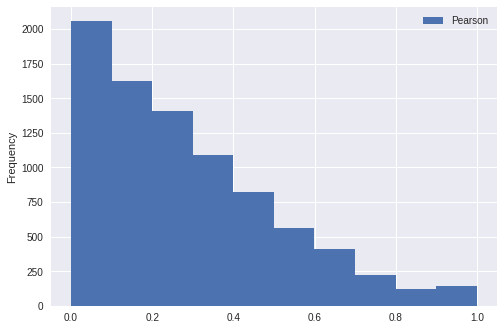

In [46]:
results_Pearson.plot.hist(y='Pearson')

### Spearman rank correlation coefficient

In [0]:
def Spearman_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  print("DEBUG: idcols = %s ; datacols = %s"%(str(idcols),str(datacols)))
  print("DEBUG: idcoltags = %s"%(str(idcoltags)))
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['SpearmanRho'] = pandas.Series(dtype='float')
  results['SpearmanP'] = pandas.Series(dtype='float')

  n_out=0; n_nan=0; n_submin=0; n_err=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      try:
        rho,pval = scipy.stats.spearmanr(A,B)
      except Exception as e:
        n_err+=1
        continue
      if numpy.isnan(rho):
        n_nan+=1
        continue
      elif rho<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = rho
      results.iloc[n_out,j+1] = pval
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  print("n_err: %d"%(n_err))
  return(results)

In [48]:
results_Spearman = Spearman_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0)
results_Spearman.head()

DEBUG: idcols = [0, 1, 2, 3] ; datacols = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
DEBUG: idcoltags = Index(['ENSG', 'HGNC', 'NCBI', 'SEX'], dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


n_out: 11025
n_nan: 345
n_submin: 3681
n_err: 15084


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,SpearmanRho,SpearmanP
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,0.984236,7.490236e-22
1,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100580.7,TMED8,283578,female,0.386207,3.851139e-02
2,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100580.7,TMED8,283578,male,0.338916,7.209914e-02
3,ENSG00000039139.9,DNAH5,1767,female,ENSG00000101200.5,AVP,551,female,0.300486,1.132302e-01
4,ENSG00000039139.9,DNAH5,1767,female,ENSG00000101200.5,AVP,551,male,0.192583,3.168845e-01


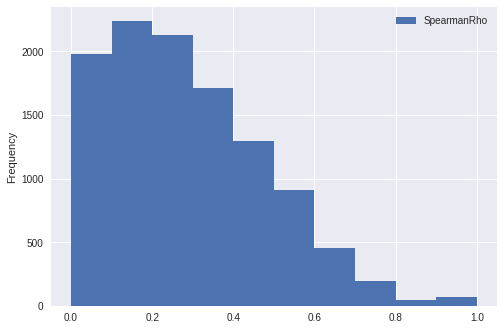

In [49]:
results_Spearman.plot.hist(y='SpearmanRho')

In [0]:
p_vs_s = pandas.merge(results_Pearson.drop(columns=['HGNCA','NCBIA','HGNCB','NCBIB']), 
                      results_Spearman.drop(columns=['HGNCA','NCBIA','HGNCB','NCBIB']), 
                      on=['ENSGA','SEXA','ENSGB','SEXB'], how='inner')

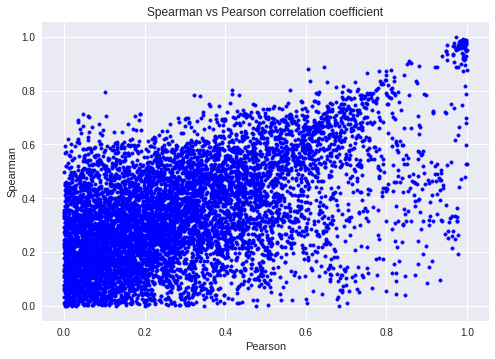

In [62]:
plt.scatter(p_vs_s.Pearson, p_vs_s.SpearmanRho, marker='.', color='b')
plt.title('Spearman vs Pearson correlation coefficient')
plt.xlabel('Pearson')
plt.ylabel('Spearman')
plt.show()

### Save correlation results

In [0]:
p_vs_s.round(3).to_csv('gtex_exfiles_p_vs_s.tsv', sep='\t', index=False)
google.colab.files.download('gtex_exfiles_p_vs_s.tsv')

### Tanimoto similarity
There is not a universally accepted definition of Tanimoto similarity for real valued vectors, as indicated by the [Jaccard index Wikipedia page](https://en.wikipedia.org/wiki/Jaccard_index). Generalizing from the bitvector form, we use the ratio of (in common) to (could be in common), using the vector dot products:

> ## $ sim = \frac{A * B}{|A|^2 + |B|^2 - A*B} $

Function range [0,1]. Unlike Cartesian distance, Jaccard/Tanimoto normalizes for vector size.

In [0]:
def Tanimoto_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['Tanimoto'] = pandas.Series(dtype='float')

  #First compute |V|^2 for each vector.
  VV = numpy.ndarray(shape=(exfiles.shape[0],1), dtype=float)
  for i in range(exfiles.shape[0]):
    V = exfiles.iloc[i,datacols]
    VV[i] = numpy.dot(V,V)

  n_out=0; n_nan=0; n_submin=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      AA = VV[iA]
      BB = VV[iB]
      AB = numpy.dot(A,B)
      den = AA + BB - AB
      t = (AB / den) if den>0 else numpy.nan
      if numpy.isnan(t):
        n_nan+=1
        continue
      elif t<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = t
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  return(results)

In [52]:
t0 = time.time()
results_Tanimoto = Tanimoto_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0)
print("Elapsed: %ds"%(time.time()-t0))
results_Tanimoto.head()

n_out: 15050
n_nan: 15085
n_submin: 0


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,Tanimoto
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,0.954722
1,ENSG00000039139.9,DNAH5,1767,female,ENSG00000082516.8,GEMIN5,25929,female,0.051274
2,ENSG00000039139.9,DNAH5,1767,female,ENSG00000082516.8,GEMIN5,25929,male,0.051422
3,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100302.6,RASD2,23551,female,0.006807
4,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100302.6,RASD2,23551,male,0.006855


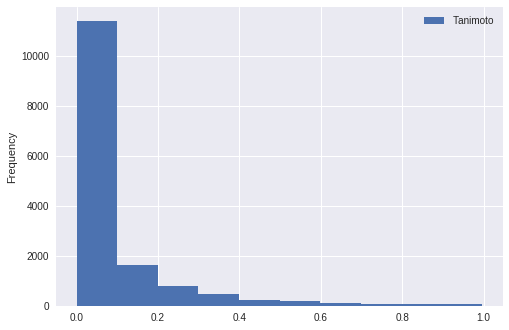

In [53]:
results_Tanimoto.plot.hist(y='Tanimoto')

### Area Between Curves (ABC)
 * Novel metric proposed by Giovanni Bocci.
 * (Sum and subtract triangle areas.) 
 * AULS = Area Under Line Segment

In [0]:
def AULS(y1, y2, w):
  a = min(y1,y2) * w
  a = a + 0.5 * w * abs(y1-y2)
  return(a)

In [0]:
def ABC(A,B):
  abc = 0.0
  for i in range(len(A)-1):
    Amid = numpy.mean(A[i:i+1])
    Bmid = numpy.mean(B[i:i+1])
    if (A[i]>=B[i]):
      if (A[i+1]>=B[i+1]):
        abc = abc + (AULS(A[i], A[i+1], 1) - AULS(B[i], B[i+1], 1))
      else:
        abc = abc + (AULS(A[i], Amid, .5) - AULS(B[i], Bmid , .5))
        abc = abc + (AULS(Bmid, B[i+1], .5) - AULS(Amid, A[i+1], .5))
    else:
      if (A[i+1]<B[i+1]):
        abc = abc + (AULS(B[i], B[i+1], 1) - AULS(A[i], A[i+1], 1))
      else:
        abc = abc + (AULS(B[i], Bmid, .5) - AULS(A[i], Amid , .5))
        abc = abc + (AULS(Amid, A[i+1], .5) - AULS(Bmid, B[i+1], .5))
  return(abc)

In [0]:
def ABC_NxN(exfiles, idcols, datacols, minval):
  idcoltags = exfiles.columns[idcols]
  results = pandas.DataFrame(index=range(int(exfiles.shape[0]**2/2)))    #N^2/2, upper bound
  for tag in idcoltags:
    results[tag+'A'] = pandas.Series()
  for tag in idcoltags:
    results[tag+'B'] = pandas.Series()
  results['ABC'] = pandas.Series(dtype='float')
  results['ABC_sim'] = pandas.Series(dtype='float')
  
  n_out=0; n_nan=0; n_submin=0;
  for iA in range(exfiles.shape[0]):
    A = exfiles.iloc[iA,datacols]
    for iB in range(iA+1, exfiles.shape[0]):
      B = exfiles.iloc[iB,datacols]
      abc = ABC(A,B)
      abc_sim = (1 / (1 + abc/len(A)))
      if numpy.isnan(abc_sim):
        n_nan+=1
        continue
      elif abc_sim<minval:
        n_submin+=1
        continue
      idvalsA = exfiles.iloc[iA,idcols].tolist()
      idvalsB = exfiles.iloc[iB,idcols].tolist()
      j=0
      for idval in idvalsA+idvalsB:
        results.iloc[n_out,j] = idval
        j+=1
      results.iloc[n_out,j] = abc
      results.iloc[n_out,j+1] = abc_sim
      n_out+=1
  results = results.dropna(how='any') #Remove unused rows
  print("n_out: %d"%(n_out))
  print("n_nan: %d"%(n_nan))
  print("n_submin: %d"%(n_submin))
  return(results)

In [54]:
t0 = time.time()
results_ABC = ABC_NxN(exfiles, list(range(4)), list(range(4,exfiles.shape[1])), 0)
print("Elapsed: %ds"%(time.time()-t0))
results_ABC.head()

n_out: 15051
n_nan: 15084
n_submin: 0


,ENSGA,HGNCA,NCBIA,SEXA,ENSGB,HGNCB,NCBIB,SEXB,ABC,ABC_sim
0,ENSG00000039139.9,DNAH5,1767,female,ENSG00000039139.9,DNAH5,1767,male,2.26225,0.927636
1,ENSG00000039139.9,DNAH5,1767,female,ENSG00000082516.8,GEMIN5,25929,female,244.64300,0.105977
2,ENSG00000039139.9,DNAH5,1767,female,ENSG00000082516.8,GEMIN5,25929,male,234.72100,0.109965
3,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100302.6,RASD2,23551,female,327.53200,0.081339
4,ENSG00000039139.9,DNAH5,1767,female,ENSG00000100302.6,RASD2,23551,male,325.47275,0.081812


In [55]:
results_ABC.describe()

,ABC,ABC_sim
count,15051.000000,15051.000000
mean,1507.767173,0.274416
std,6893.770403,0.276568
min,0.000000,0.000616
25%,51.107625,0.071225
50%,139.855250,0.171745
75%,378.161750,0.362013
max,47023.259500,1.000000


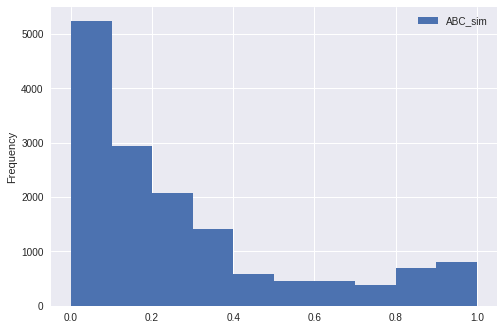

In [56]:
results_ABC.plot.hist(y='ABC_sim')

In [0]:
a_vs_t = pandas.merge(results_Tanimoto.drop(columns=['HGNCA','NCBIA','HGNCB','NCBIB']), 
                      results_ABC.drop(columns=['HGNCA','NCBIA','HGNCB','NCBIB']), 
                      on=['ENSGA','SEXA','ENSGB','SEXB'], how='inner')

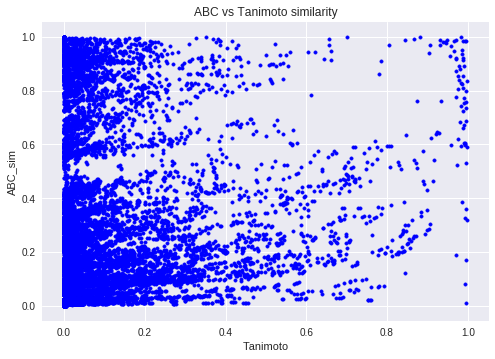

In [65]:
plt.scatter(a_vs_t.Tanimoto, a_vs_t.ABC_sim, marker='.', color='b')
plt.title('ABC vs Tanimoto similarity')
plt.xlabel('Tanimoto')
plt.ylabel('ABC_sim')
plt.show()

### Save similarity results

In [0]:
a_vs_t.round(3).to_csv('gtex_exfiles_a_vs_t.tsv', sep='\t', index=False)
google.colab.files.download('gtex_exfiles_a_vs_t.tsv')

### Altair interactive plots

In [76]:
p_vs_s['SEXAB'] = p_vs_s.SEXA.map(str) + '-' + p_vs_s.SEXB.map(str)
altair.Chart(p_vs_s.sample(2000)).mark_point().encode(
    x='Pearson',
    y='SpearmanRho',
    color='SEXAB'
).interactive()

Chart({
  data:                    ENSGA    SEXA              ENSGB    SEXB   Pearson  \
  7341   ENSG00000235191.1  female  ENSG00000237575.4  female  0.040898   
  4742   ENSG00000173334.3  female  ENSG00000235191.1  female  0.305219   
  1297   ENSG00000120800.4  female  ENSG00000170270.4    male  0.192285   
  3482   ENSG00000162415.6  female  ENSG00000225556.1    male  0.088279   
  4008   ENSG00000169397.3  female  ENSG00000176177.9    male  0.020589   
  3016   ENSG00000154079.5    male  ENSG00000203784.2  female  0.250850   
  6263   ENSG00000188991.3  female  ENSG00000267772.1    male  0.671624   
  5796   ENSG00000184451.5    male  ENSG00000256232.1    male  0.617801   
  5333   ENSG00000176402.5    male  ENSG00000186130.4    male  0.155540   
  1983   ENSG00000126458.3    male  ENSG00000184811.3    male  0.209581   
  3225   ENSG00000158292.6    male  ENSG00000186105.7    male  0.436824   
  6705   ENSG00000204952.2  female  ENSG00000235191.1  female  0.023893   
  6709   ENSG00000204952.2  female  ENSG00000236939.2    male  0.548383   
  3148   ENSG00000158292.6  female  ENSG00000230565.1  female  0.173645   
  6706   ENSG00000204952.2  female  ENSG00000235593.1  female  0.656933   
  348    ENSG00000082516.8    male  ENSG00000163132.6    male  0.408986   
  3599  ENSG00000162444.11  female  ENSG00000163132.6    male  0.351887   
  3771   ENSG00000163132.6  female  ENSG00000244681.1    male  0.176303   
  5218   ENSG00000176177.9  female  ENSG00000270084.1  female  0.397064   
  5379   ENSG00000180919.3  female  ENSG00000181631.6    male  0.152766   
  5760   ENSG00000184451.5    male  ENSG00000186130.4    male  0.250106   
  4838   ENSG00000174106.2  female  ENSG00000187242.4  female  0.107725   
  7110   ENSG00000225556.1  female  ENSG00000236939.2    male  0.199739   
  6716   ENSG00000204952.2  female  ENSG00000255043.1  female  0.046804   
  7386   ENSG00000235191.1    male  ENSG00000257585.1  female  0.012048   
  3139   ENSG00000158292.6  female  ENSG00000223534.1  female  0.415564   
  1630   ENSG00000121797.9    male  ENSG00000187242.4    male  0.195652   
  5215   ENSG00000176177.9  female  ENSG00000261373.1    male  0.029742   
  6345   ENSG00000203784.2  female  ENSG00000260760.1  female  0.387413   
  6815   ENSG00000205832.7  female  ENSG00000264954.1  female  0.541972   
  ...                  ...     ...                ...     ...       ...   
  5143   ENSG00000175229.6    male  ENSG00000214842.5  female  0.319003   
  3424   ENSG00000158715.5    male  ENSG00000244681.1    male  0.782262   
  7456   ENSG00000235593.1  female  ENSG00000267772.1    male  0.124385   
  4761   ENSG00000173334.3  female  ENSG00000264954.1  female  0.381453   
  7481   ENSG00000235914.1  female  ENSG00000252481.1  female  0.437893   
  1218   ENSG00000111432.4    male  ENSG00000174807.3    male  0.044889   
  2837  ENSG00000152128.13    male  ENSG00000230565.1  female  0.507791   
  612    ENSG00000100580.7  female  ENSG00000235191.1  female  0.492685   
  2170   ENSG00000132911.4    male  ENSG00000260032.1    male  0.421380   
  7662   ENSG00000252481.1    male  ENSG00000255043.1    male  0.280488   
  6704   ENSG00000204952.2  female  ENSG00000234186.2    male  0.980315   
  1280   ENSG00000120800.4  female  ENSG00000149635.2    male  0.046920   
  1575   ENSG00000121797.9  female  ENSG00000255043.1  female  0.290458   
  5461   ENSG00000180919.3    male  ENSG00000203950.6  female  0.026427   
  4146   ENSG00000170270.4  female  ENSG00000235191.1    male  0.329124   
  4331   ENSG00000170915.8    male  ENSG00000182747.4    male  0.143536   
  1241   ENSG00000111432.4    male  ENSG00000214842.5  female  0.355822   
  5410   ENSG00000180919.3  female  ENSG00000230565.1  female  0.318839   
  6364   ENSG00000203784.2    male  ENSG00000229647.1    male  0.137986   
  7259   ENSG00000230565.1    male  ENSG00000252481.1    male  0.874506   
  4920   ENSG00000174106.2    male  ENSG00000187242.4    male  0.132431   
  235    EN

In [77]:
a_vs_t['SEXAB'] = a_vs_t.SEXA.map(str) + '-' + a_vs_t.SEXB.map(str)
altair.Chart(a_vs_t.sample(2000)).mark_point().encode(
    x='Tanimoto',
    y='ABC_sim',
    color='SEXAB'
).interactive()

Chart({
  data:                     ENSGA    SEXA               ENSGB    SEXB  Tanimoto  \
  10708   ENSG00000180919.3  female   ENSG00000204366.3    male  0.009029   
  1948   ENSG00000107164.15    male   ENSG00000205832.7  female  0.008732   
  4058    ENSG00000132911.4    male   ENSG00000170270.4    male  0.007983   
  7143    ENSG00000162415.6    male   ENSG00000236939.2    male  0.102596   
  9134    ENSG00000172568.4  female   ENSG00000237575.4    male  0.025145   
  13876   ENSG00000225556.1    male   ENSG00000230565.1  female  0.328399   
  3212    ENSG00000123999.4    male   ENSG00000215241.3  female  0.063942   
  6912    ENSG00000158715.5    male   ENSG00000261366.1    male  0.118340   
  1503    ENSG00000101200.5  female   ENSG00000257585.1  female  0.142954   
  283     ENSG00000039139.9    male   ENSG00000205832.7  female  0.256286   
  10379   ENSG00000176177.9  female   ENSG00000260032.1  female  0.001934   
  3500    ENSG00000124098.9    male   ENSG00000187242.4    male  0.002963   
  3415    ENSG00000124098.9  female   ENSG00000262179.2  female  0.015578   
  2450    ENSG00000120800.4  female   ENSG00000235532.1  female  0.025941   
  4715    ENSG00000141579.6    male   ENSG00000235532.1  female  0.000160   
  6219    ENSG00000154079.5  female   ENSG00000223597.2  female  0.000000   
  916     ENSG00000100302.6    male   ENSG00000172938.3    male  0.010580   
  11131   ENSG00000182747.4  female   ENSG00000267772.1  female  0.000000   
  13210   ENSG00000205832.7  female   ENSG00000261366.1    male  0.130287   
  5770    ENSG00000149635.2    male   ENSG00000174807.3    male  0.000073   
  4047    ENSG00000132911.4    male  ENSG00000162444.11  female  0.001000   
  4668    ENSG00000141579.6    male   ENSG00000183798.4    male  0.018543   
  11022   ENSG00000181631.6    male   ENSG00000255043.1  female  0.000135   
  9636    ENSG00000173334.3    male   ENSG00000214842.5    male  0.001693   
  1376    ENSG00000101200.5  female   ENSG00000141579.6    male  0.000069   
  14188   ENSG00000234186.2    male   ENSG00000270084.1    male  0.047187   
  10169   ENSG00000175229.6  female   ENSG00000237575.4    male  0.041659   
  1778   ENSG00000107164.15  female   ENSG00000203872.6  female  0.030853   
  13847   ENSG00000225556.1  female   ENSG00000244681.1    male  0.045647   
  4642    ENSG00000141579.6    male   ENSG00000170915.8    male  0.037452   
  ...                   ...     ...                 ...     ...       ...   
  3830    ENSG00000126458.3    male   ENSG00000230565.1  female  0.006361   
  11161   ENSG00000182747.4    male   ENSG00000205832.7  female  0.158745   
  3973    ENSG00000132911.4  female   ENSG00000224308.1  female  0.000129   
  7542    ENSG00000163132.6  female   ENSG00000264954.1  female  0.016256   
  1704   ENSG00000107164.15  female   ENSG00000142619.4  female  0.109265   
  5110    ENSG00000145309.5  female   ENSG00000203784.2    male  0.085122   
  7324   ENSG00000162444.11    male   ENSG00000174807.3    male  0.718819   
  9465    ENSG00000172938.3    male   ENSG00000255398.2    male  0.008666   
  9966    ENSG00000174807.3  female   ENSG00000235914.1    male  0.000001   
  4505    ENSG00000141579.6  female   ENSG00000173334.3  female  0.091338   
  11850   ENSG00000186105.7    male   ENSG00000235191.1    male  0.104025   
  3192    ENSG00000123999.4    male   ENSG00000187180.3  female  0.008416   
  11408   ENSG00000184451.5  female   ENSG00000188991.3    male  0.003589   
  6178    ENSG00000154079.5  female   ENSG00000176402.5    male  0.245362   
  11557   ENSG00000184451.5    male   ENSG00000262179.2  female  0.099158   
  4012    ENSG00000132911.4  female   ENSG00000260760.1    male  0.368886   
  11879   ENSG00000186105.7    male   ENSG00000261366.1  female  0.551021   
  11401   ENSG00000184451.5  female   ENSG00000186130.4  female  0.481369   
  10495   ENSG00000176402.5  female   ENSG00000181631.6    male  0.018749   
  9091    ENSG00000172568.4  female   ENSG00000188991.3  fe

### Ex-files comparison plots

In [116]:
hgncs = ['DNAH5','RASD2']
exfiles_this = exfiles[exfiles.HGNC.isin(hgncs)].drop(columns=['ENSG','NCBI'])
exfiles_this = exfiles_this.melt(id_vars = ['HGNC','SEX'], var_name = "tissue", value_name = "TPM")
exfiles_this['LOG10(TPM+1)'] = (exfiles_this.TPM+1).apply(numpy.log10)
exfiles_this.head()

,HGNC,SEX,tissue,TPM,LOG10(TPM+1)
0,DNAH5,female,Adipose - Visceral (Omentum),0.053,0.022428
1,DNAH5,male,Adipose - Visceral (Omentum),0.064,0.026942
2,RASD2,female,Adipose - Visceral (Omentum),2.002,0.477411
3,RASD2,male,Adipose - Visceral (Omentum),2.184,0.502973
4,DNAH5,female,Adrenal Gland,0.079,0.033021


In [117]:
exfiles_this['HGNC_SEX'] = exfiles_this.HGNC.map(str) + '_' + exfiles_this.SEX.map(str)
altair.Chart(exfiles_this).mark_line(point=True).encode(
  x='tissue',
  y='LOG10(TPM+1)',
  color='HGNC_SEX'
)

Chart({
  data:       HGNC     SEX                               tissue     TPM  LOG10(TPM+1)  \
  0    DNAH5  female         Adipose - Visceral (Omentum)   0.053      0.022428   
  1    DNAH5    male         Adipose - Visceral (Omentum)   0.064      0.026942   
  2    RASD2  female         Adipose - Visceral (Omentum)   2.002      0.477411   
  3    RASD2    male         Adipose - Visceral (Omentum)   2.184      0.502973   
  4    DNAH5  female                        Adrenal Gland   0.079      0.033021   
  5    DNAH5    male                        Adrenal Gland   0.079      0.033021   
  6    RASD2  female                        Adrenal Gland   2.873      0.588047   
  7    RASD2    male                        Adrenal Gland   2.553      0.550595   
  8    DNAH5  female                       Artery - Aorta   0.083      0.034628   
  9    DNAH5    male                       Artery - Aorta   0.072      0.030195   
  10   RASD2  female                       Artery - Aorta  18.810      1.296884   
  11   RASD2    male                       Artery - Aorta  19.860      1.319314   
  12   DNAH5  female                    Artery - Coronary   0.064      0.026942   
  13   DNAH5    male                    Artery - Coronary   0.066      0.027757   
  14   RASD2  female                    Artery - Coronary   6.090      0.850646   
  15   RASD2    male                    Artery - Coronary   7.353      0.921842   
  16   DNAH5  female                      Artery - Tibial   0.046      0.019532   
  17   DNAH5    male                      Artery - Tibial   0.058      0.024486   
  18   RASD2  female                      Artery - Tibial   3.982      0.697404   
  19   RASD2    male                      Artery - Tibial   3.634      0.665956   
  20   DNAH5  female                              Bladder   0.613      0.207634   
  21   DNAH5    male                              Bladder   0.922      0.283753   
  22   RASD2  female                              Bladder   5.712      0.826852   
  23   RASD2    male                              Bladder   6.519      0.876160   
  24   DNAH5  female                   Brain - Cerebellum   0.386      0.141763   
  25   DNAH5    male                   Brain - Cerebellum   0.464      0.165541   
  26   RASD2  female                   Brain - Cerebellum   8.445      0.975202   
  27   RASD2    male                   Brain - Cerebellum   7.998      0.954146   
  28   DNAH5  female                       Brain - Cortex   0.286      0.109241   
  29   DNAH5    male                       Brain - Cortex   0.270      0.103804   
  ..     ...     ...                                  ...     ...           ...   
  86   RASD2  female                             Pancreas   1.031      0.307710   
  87   RASD2    male                             Pancreas   1.163      0.335057   
  88   DNAH5  female                            Pituitary   3.337      0.637189   
  89   DNAH5    male                            Pituitary   2.816      0.581608   
  90   RASD2  female                            Pituitary   4.525      0.742332   
  91   RASD2    male                            Pituitary   3.498      0.653019   
  92   DNAH5  female  Skin - Not Sun Exposed (Suprapubic)   0.072      0.030195   
  93   DNAH5    male  Skin - Not Sun Exposed (Suprapubic)   0.073      0.030600   
  94   RASD2  female  Skin - Not Sun Exposed (Suprapubic)   2.015      0.479287   
  95   RASD2    male  Skin - Not Sun Exposed (Suprapubic)   2.438      0.536306   
  96   DNAH5  female       Skin - Sun Exposed (Lower leg)   0.091      0.037825   
  97   DNAH5    male       Skin - Sun Exposed (Lower leg)   0.113      0.046495   
  98   RASD2  female       Skin - Sun Exposed (Lower leg)   2.481      0.541704   
  99   RASD2    male       Skin - Sun Exposed (Lower leg)   2.752      0.574263   
  100  DNAH5  female     Small Intestine - Terminal Ileum   0.147      0.059563   
  101  DNAH5    male     Small Intestine - Terminal Ileum   0.130      0.053078   
  